#0. Preparing

In [ ]:
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from scipy import signal
import pywt
import cv2
import skimage

In [ ]:
LENA_PATH = "/content/drive/MyDrive/Semester 8/Computer Vision/HW/3/Lena.bmp"
lena_img = rgb2gray(imread(LENA_PATH))

In [ ]:
BARBARA_PATH = "/content/drive/MyDrive/Semester 8/Computer Vision/HW/3/Barbara.bmp"
barbara_img = rgb2gray(imread(BARBARA_PATH))

In [ ]:
BABOON_PATH = "/content/drive/MyDrive/Semester 8/Computer Vision/HW/3/Baboon.bmp"
baboon_img = rgb2gray(imread(BABOON_PATH))

# 1. Frequency Domain

## 1.1. Fourier Transform

### 1.1.1.
For each filter given below, compute its Fourier transform, and illustrate its magnitude and phase response. For each filter, if it is separable, compute the FT separately. If not, compute the FT directly. (Test on grayscale Lena Image)

Fist, define the filters:

In [ ]:
filter_a = np.array([[-1, -1, -1],
                    [-1,  9, -1],
                    [-1, -1, -1]])
filter_b = np.array([[ 1, 3, 1],
                    [3, 9, 3],
                    [1,3,1]]) / 25
filter_c = np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])
filter_d = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

all_filters = [filter_a, filter_b, filter_c, filter_d]
direct_filters = [filter_a, filter_c]
seprate_filters = [filter_b, filter_d]

A two-dimensional filter kernel is separable if it can be expressed as the outer product of two vectors.
According to that, only filter_b and filter_c are seprable:


In [ ]:
b_1 = np.array([[1, 3, 1]]).T / 5
b_2 = np.array([[1, 3, 1]]) / 5

In [ ]:
d_1 = np.array([[-1, 0, 1]]).T
d_2 = np.array([[1, 2, 1]])

Then, computue the magnitude and phase response of all filter:

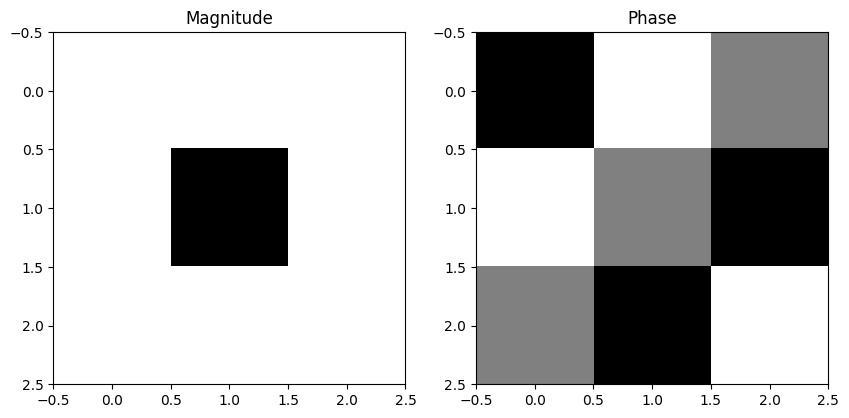

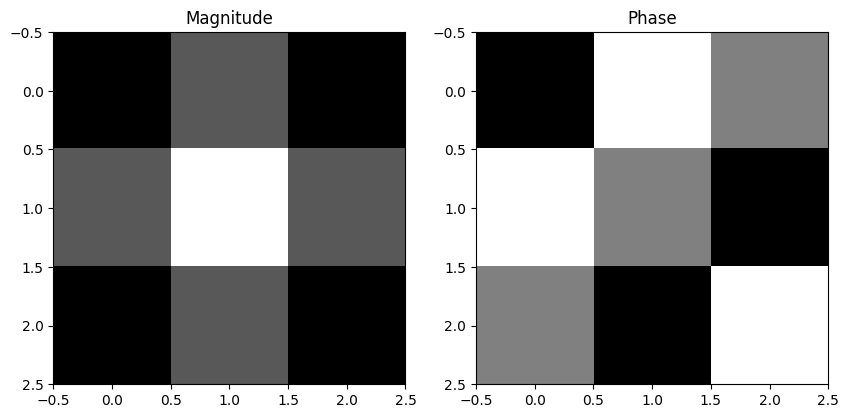

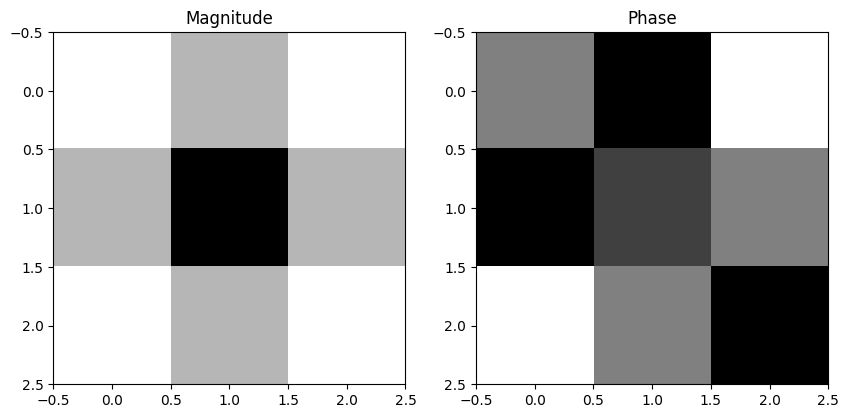

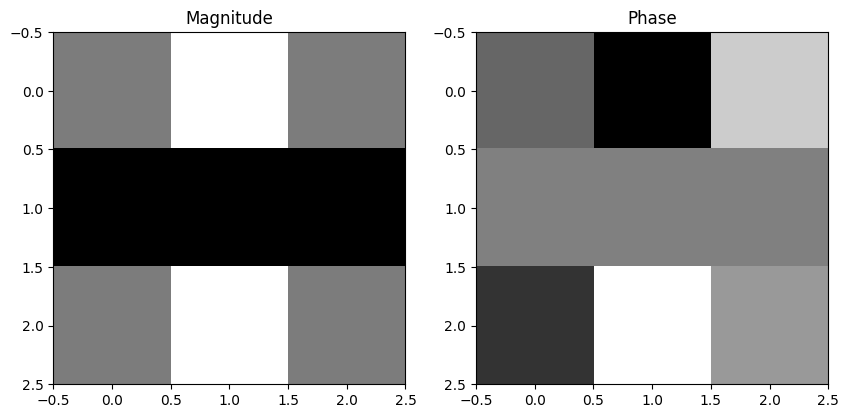

In [ ]:
for f in all_filters:
  # Compute the Fourier Transform of the filter and
  # Shift the zero frequency component to the center
  filter = np.fft.fftshift(np.fft.fft2(f))

  # Compute the magnitude and phase response
  magnitude = np.log(1 + np.abs(filter))
  phase = np.angle(filter)

  plt.figure(figsize=(10,8))

  plt.subplot(1,2,1)
  plt.imshow(magnitude, cmap='gray')
  plt.title(f'Magnitude')

  plt.subplot(1,2,2)
  plt.imshow(phase, cmap= 'gray')
  plt.title(f'Phase')

  plt.show()

After that, Apply filters to greyscale Lena and illustrate the magnitude and phase. The filters are not separable.

In [ ]:
def zero_padding(array, p, q):
  h, w = array.shape

  new_array = np.zeros((p,q), dtype=array.dtype)

  new_array[:h,:w] = array

  return new_array

In [ ]:
def compute_fourier_transform_filter(filter):
    h, w = lena_img.shape
    p, q = 2 * h, 2 * w

    lena_zero_pad = zero_padding(lena_img, p, q)
    lena_ft =  np.fft.fftshift(np.fft.fft2(lena_zero_pad))

    filter_zero_pad = zero_padding(filter, p, q)
    filter_ft = np.fft.fftshift(np.fft.fft2(filter_zero_pad))

    lena_filtered = lena_ft * filter_ft

    # Compute the magnitude and phase response
    magnitude = np.log(1 + np.abs(lena_filtered))
    phase = np.angle(lena_filtered)

    return magnitude, phase


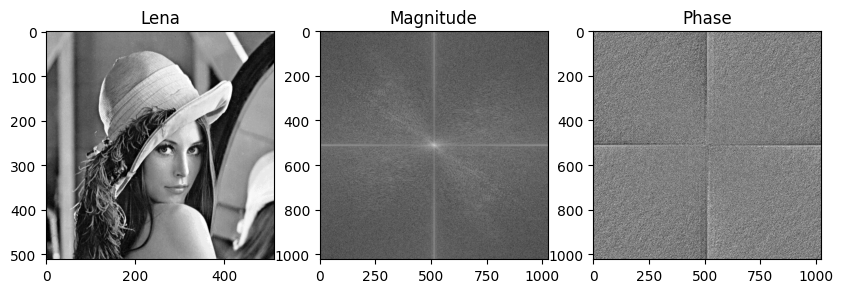

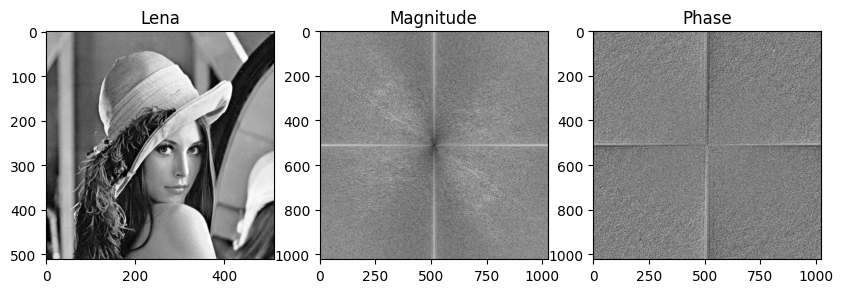

In [ ]:
for index, filter in enumerate(direct_filters):
  # Compute the Fourier Transform, magnitude, and phase response of the filter
  filter_magnitude, filter_phase = compute_fourier_transform_filter(filter)

  plt.figure(figsize=(10,8))

  plt.subplot(1, 3, 1)
  plt.imshow(lena_img, cmap='gray')
  plt.title(f'Lena')

  plt.subplot(1, 3, 2)
  plt.imshow(filter_magnitude, cmap='gray')
  plt.title(f'Magnitude')

  plt.subplot(1, 3, 3)
  plt.imshow(filter_phase, cmap='gray')
  plt.title(f'Phase')

  plt.show()


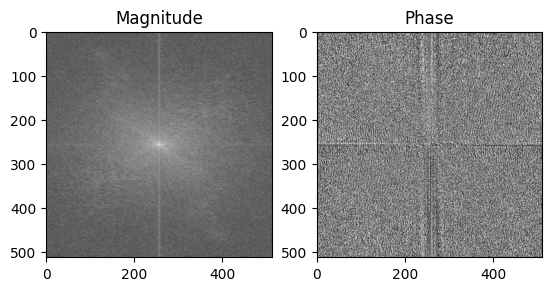

In [ ]:
b_1 = np.array([[1, 3, 1]]).T / 5
b_2 = np.array([[1, 3, 1]]) / 5

lena_ft =  np.fft.fftshift(np.fft.fft2(lena_img))

b_1 = np.fft.fftshift(np.fft.fft(b_1))
b_2 = np.fft.fftshift(np.fft.fft(b_2))

lena_filtered = signal.convolve2d(lena_ft, b_1, mode='same')
lena_filtered = signal.convolve2d(lena_filtered, b_2, mode='same')

magnitude = np.log(np.abs(lena_filtered))
phase = np.angle(lena_filtered)


plt.subplot(1, 2, 1)
plt.imshow(magnitude, cmap='gray')
plt.title(f'Magnitude')

plt.subplot(1, 2, 2)
plt.imshow(phase, cmap='gray')
plt.title(f'Phase')

plt.show()

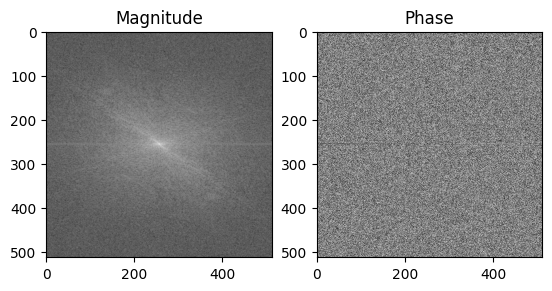

In [ ]:
d_1 = np.array([[-1, 0, 1]]).T
d_2 = np.array([[1, 2, 1]])

lena_ft =  np.fft.fftshift(np.fft.fft2(lena_img))

d_1 = np.fft.fftshift(np.fft.fft(d_1))
d_2 = np.fft.fftshift(np.fft.fft(d_2))

lena_filtered = signal.convolve2d(lena_ft, d_1, mode='same')
lena_filtered = signal.convolve2d(lena_filtered, d_2, mode='same')

magnitude = np.log(np.abs(lena_filtered))
phase = np.angle(lena_filtered)


plt.subplot(1, 2, 1)
plt.imshow(magnitude, cmap='gray')
plt.title(f'Magnitude')

plt.subplot(1, 2, 2)
plt.imshow(phase, cmap='gray')
plt.title(f'Phase')

plt.show()

### 1.1.2.
Perform 2D DFT on grayscale Lena, Barbara, and Baboon images. Display the magnitude of the DFT image with and without shifting and with and without logarithmic. Display and discuss the results.

In [ ]:
pictures = [
    (lena_img, 'Lena'),
     (barbara_img, 'Barbara'),
      (baboon_img, 'Baboon')
      ]

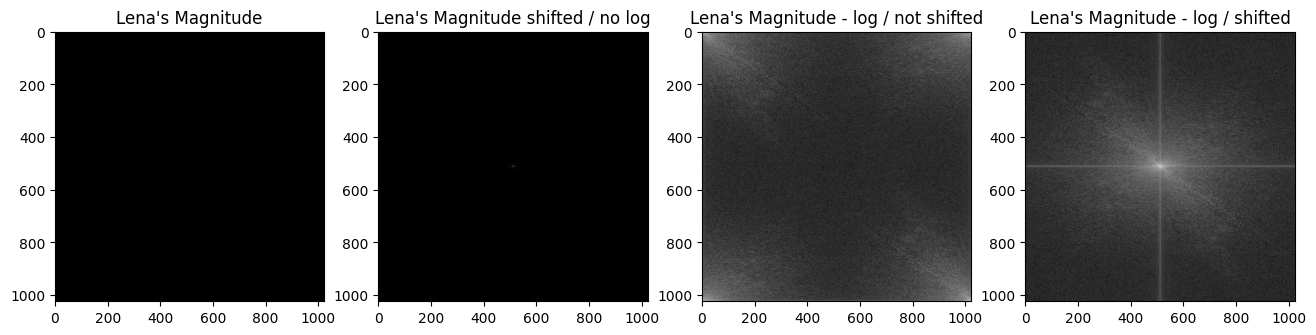

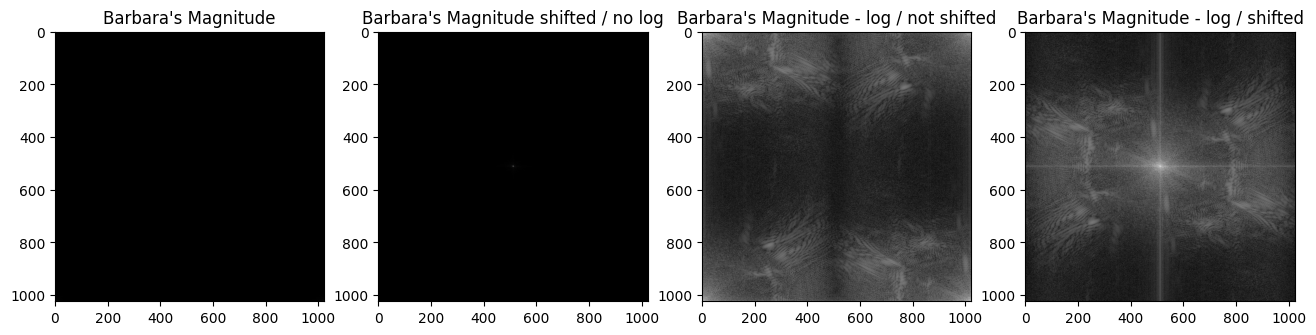

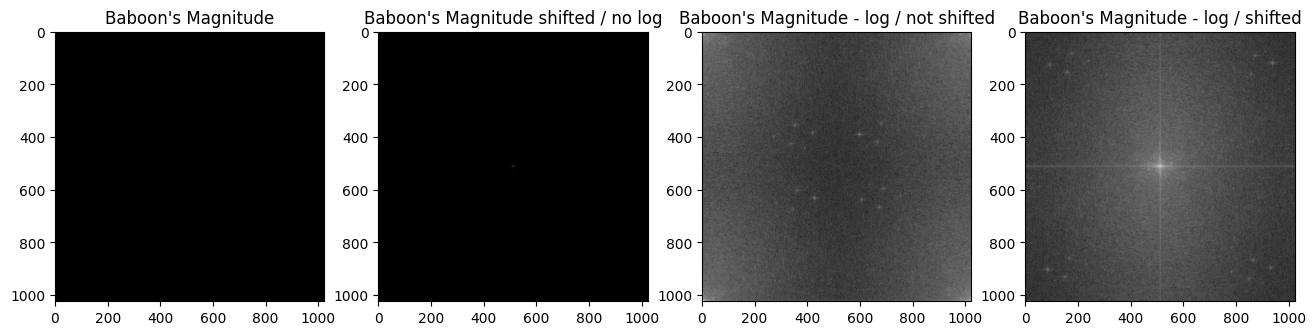

In [ ]:
for pic in pictures:

  h, w = pic[0].shape
  p, q = 2 * h, 2 * w

  pic_padded = zero_padding(pic[0], p, q)

  plt.figure(figsize=(16, 16))

  # Magnitude of the picture - not shifted / no log
  ft_pic = (np.fft.fft2((pic_padded)))
  magnitude = np.abs(ft_pic)

  plt.subplot(1, 4, 1)
  plt.imshow(magnitude, cmap='gray')
  plt.title(f'{pic[1]}\'s Magnitude')

  # Magnitude of the picture - shifted / no log
  ft_pic = np.fft.fftshift(np.fft.fft2((pic_padded)))
  magnitude = np.abs(ft_pic)

  plt.subplot(1, 4, 2)
  plt.imshow(magnitude, cmap='gray')
  plt.title(f'{pic[1]}\'s Magnitude shifted / no log')

  # Magnitude of the picutre - log / not shifted
  ft_pic = np.fft.fft2((pic_padded))
  magnitude = np.log(1 + np.abs(ft_pic))

  plt.subplot(1, 4, 3)
  plt.imshow(magnitude, cmap='gray')
  plt.title(f'{pic[1]}\'s Magnitude - log / not shifted')

  # Magnitude of the picture - shifted and log
  ft_pic = np.fft.fftshift(np.fft.fft2((pic_padded)))
  magnitude = np.log(1 + np.abs(ft_pic))

  plt.subplot(1, 4, 4)
  plt.imshow(magnitude, cmap='gray')
  plt.title(f'{pic[1]}\'s Magnitude - log / shifted')

  plt.show()

#### Discussing the result

Typically, when an image is transformed into the frequency domain, the frequency center is shifted to the coordinate origin. This means that the (0,0) frequency, which usually contains important information, is located at the (0,0) position in the image and may not be clearly visible. To address this, it is necessary to shift the frequency center to the image center; otherwise, frequency components will appear in the image's four corners. When visualizing the image spectrum in the frequency domain, we often take the logarithm of the spectrum. This is because the center of the spectrum contains a large value, representing the sum of all the pixels, which appears as a bright dot in the middle while the surrounding areas are black. To reduce the intensity difference between this central part and the surrounding regions, we apply the logarithm before displaying the spectrum.

## 1.2. Filtering

### 1.2.1.
Write a program that filters grayscale Barbara image by zeroing out certain DFT coefficients and also display and compare the original and processed images.

##### a

 Let 𝐹(𝑘, 𝑙) = 0 for 𝑇𝑁 < {𝑘, 𝑙} < (1 − 𝑇 )𝑁 (𝑇 = 1/2, 1/4, 1/8)

In [ ]:
T = [1/2, 1/4, 1/8]
M, N = barbara_img.shape

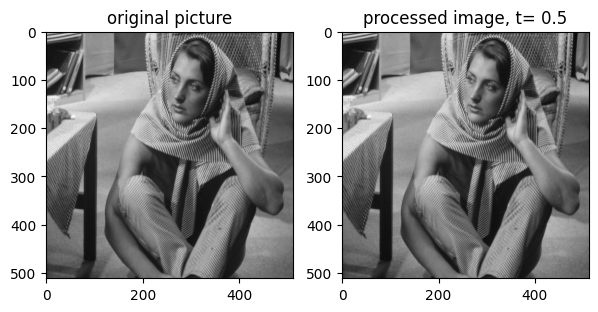

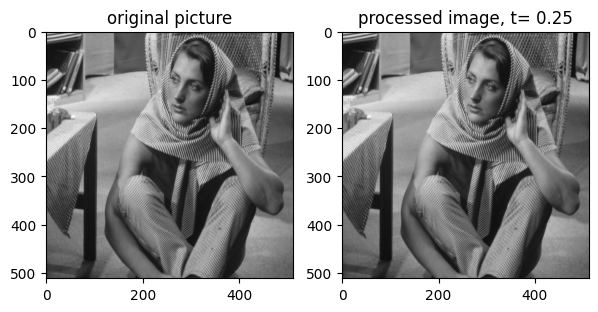

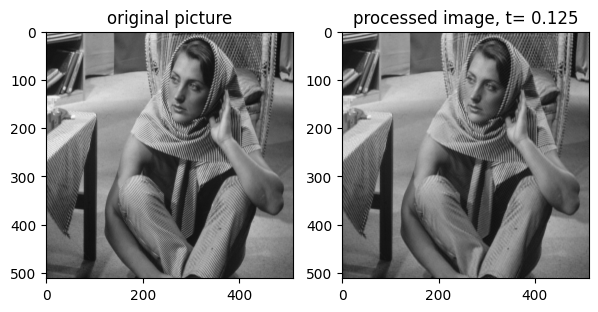

In [ ]:
barbara = cv2.imread(BARBARA_PATH, cv2.IMREAD_GRAYSCALE)
barbara_ft = np.fft.fft2(barbara)

for t in T:
  for k in range(M):
      for l in range(N):
        if ((t*N) < k < ((1-t)*N) and (t*N) < l < ((1-t)*N)):
          barbara_ft[k, l] = 0

  processed = np.abs(np.fft.ifft2(barbara_ft))

  plt.figure(figsize=(7,5))

  plt.subplot(1,2,1)
  plt.imshow(barbara_img, cmap= 'gray')
  plt.title('original picture')


  plt.subplot(1,2,2)
  plt.imshow(processed, cmap= 'gray')
  plt.title(f'processed image, t= {t}')

  plt.show()

##### b

Let 𝐹(𝑘, 𝑙) = 0 for the following regions :
i. 0 ≤ {𝑘 𝑎𝑛𝑑 𝑙} ≤ 𝑇𝑁; <br/>
ii. 0 <= 𝑘 <= 𝑇𝑁, 𝑎𝑛𝑑 (1 − 𝑇)𝑁 ≤ 𝑙 ≤ 𝑁 − 1; <br/>
iii. (1 − 𝑇)𝑁 ≤ 𝑘 ≤ 𝑁 − 1 𝑎𝑛𝑑 0 ≤ {𝑙} ≤ 𝑇𝑁; <br/>
iv. (1 − 𝑇)𝑁 ≤ 𝑘 𝑎𝑛𝑑 𝑙 ≤ 𝑁 − 1; <br/>
(𝑇 = 1/2, 1/4, 1/8) <br/>

In [ ]:
T = [1/2, 1/4, 1/8]
M, N = barbara_img.shape

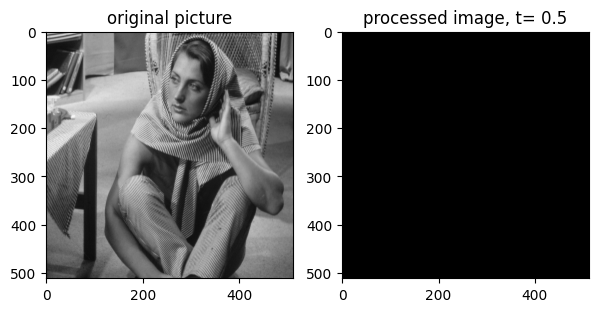

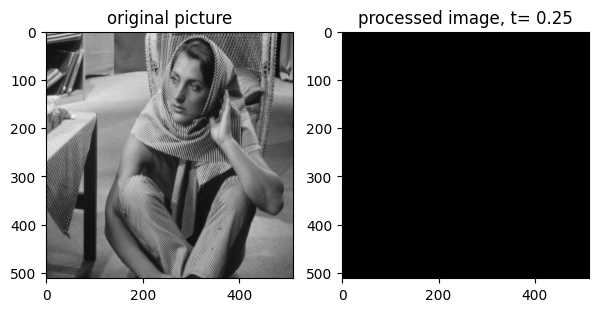

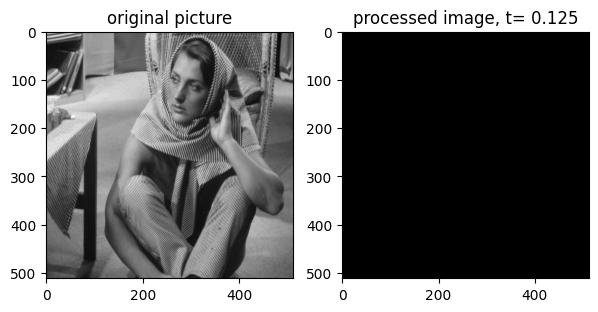

In [ ]:
barbara = cv2.imread(BARBARA_PATH, cv2.IMREAD_GRAYSCALE)
barbara = np.fft.fft2(barbara)

for t in T:
  for k in range(M):
      for l in range(N):
        # i
        if 0 <= k <= (t*M) and 0 <= l <= (t*N):
          barbara[k, l] = 0
        # ii
        elif 0 <= k <= (t*M) and ((1 -t)*N) <= l <= (N-1):
          barbara[k, l] = 0
        # iii
        elif ((1 -t)*M) <= k <= (M-1) and 0 <= l and l <= (t*N):
          barbara[k, l] = 0
        # iv
        elif ((1 -t)*M) <= k and l <= (N-1):
          barbara[k, l] = 0

  processed_b = np.abs(np.fft.ifft2(barbara))

  plt.figure(figsize=(7,5))

  plt.subplot(1,2,1)
  plt.imshow(cv2.imread(BARBARA_PATH, cv2.IMREAD_GRAYSCALE), cmap= 'gray')
  plt.title('original picture')


  plt.subplot(1,2,2)
  plt.imshow(np.log(1 + processed_b), cmap= 'gray')
  plt.title(f'processed image, t= {t}')

  plt.show()

# 2. Wavelet

## 2.1 Pyramid

### 2.1.1.

For the Barbara image, build a 5 level Gaussian and Laplacian pyramid and display them in the pyramid format.

First, build Guassian pyramid:

In [ ]:
layer = barbara_img
gaussian_pyramid = [layer]

# Build 5 levels of the Gaussian Pyramid
for i in range(5):
    layer = cv2.GaussianBlur(layer, (0,0), 1)
    layer = cv2.pyrDown(layer)
    gaussian_pyramid.append(layer)


Then, illustrate the pyramid:

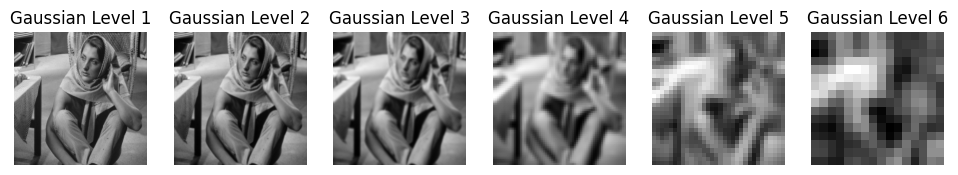

In [ ]:
plt.figure(figsize=(12, 6))
levels = len(gaussian_pyramid)

for i in range(levels):
    plt.subplot(2, levels, i+1)
    plt.imshow(gaussian_pyramid[i], cmap='gray')
    plt.title(f'Gaussian Level {i+1}')
    plt.axis('off')

plt.show()

Follow the same steps to build and illustrate Laplacian pyramid

In [ ]:
laplacian_pyramid = []
for i in range(5, 0, -1):
  # Expand the picture in i-th level gaussian_pyramid
  gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=gaussian_pyramid[i-1].shape[:2][::-1])

  # Subtract the two level of gaussian_pyramid
  laplacian = cv2.subtract(gaussian_pyramid[i-1], gaussian_expanded)


  laplacian_pyramid.append(laplacian)

laplacian_pyramid.reverse()

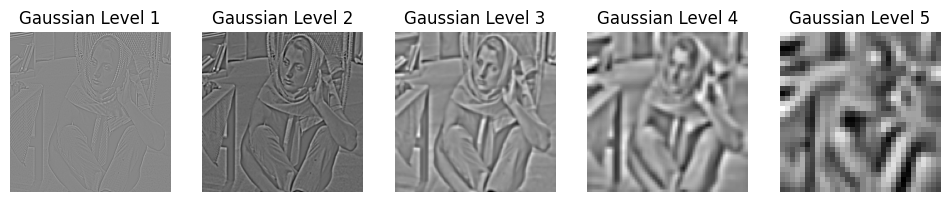

In [ ]:
plt.figure(figsize=(12, 6))
levels = len(laplacian_pyramid)

for i in range(levels):
    plt.subplot(2, levels, i+1)
    plt.imshow(laplacian_pyramid[i], cmap='gray')
    plt.title(f'Gaussian Level {i + 1}')
    plt.axis('off')

plt.show()

Second method:

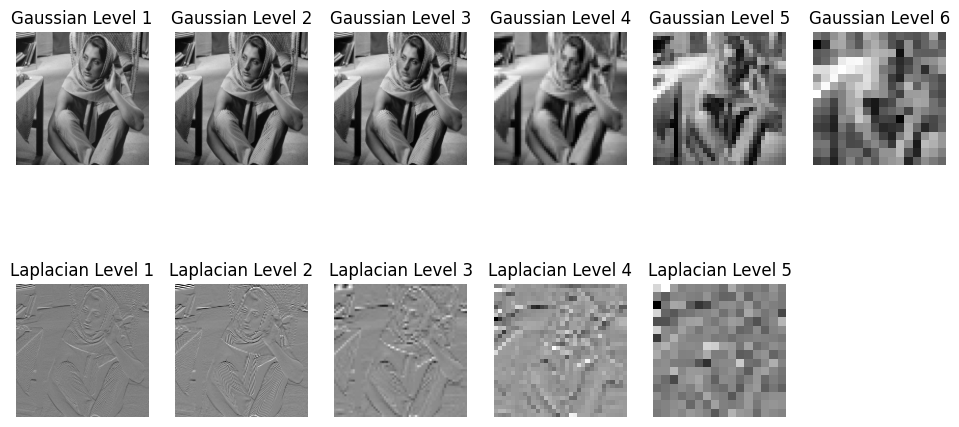

In [ ]:
wavelet = 'haar'
levels = 5

# Build the Gaussian and Laplacian pyramids
gaussian_pyramid = [barbara_img]
laplacian_pyramid = []

for i in range(levels):
    coeffs = pywt.dwt2(gaussian_pyramid[i], wavelet)
    cA, (cH, cV, cD) = coeffs
    gaussian_pyramid.append(cA)
    laplacian_pyramid.append((cH, cV, cD))

# Display the Gaussian and Laplacian pyramids
plt.figure(figsize=(12, 6))
levels = len(gaussian_pyramid)

for i in range(levels):
    plt.subplot(2, levels, i+1)
    plt.imshow(gaussian_pyramid[i], cmap='gray')
    plt.title(f'Gaussian Level {i+1}')
    plt.axis('off')

for i in range(levels-1):
    plt.subplot(2, levels, levels+i+1)
    plt.imshow(laplacian_pyramid[i][0], cmap='gray')
    plt.title(f'Laplacian Level {i+1}')
    plt.axis('off')

plt.show()



### 2.1.2.
For the grayscale Lena image, manually compute a 3-level approximation pyramid and corresponding prediction residual pyramid. Use 3x3 averaging for the approximation and use pixel replication for the interpolation filters.

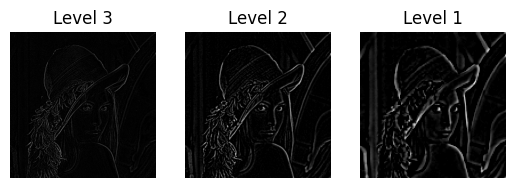

In [ ]:
lena_img = cv2.imread(LENA_PATH, cv2.IMREAD_GRAYSCALE)
# Compute the approximation pyramid
approx_pyramid = [lena_img]
for i in range(2):
  # Downsample the last approximation image in the pyramid to half its size
  h, w = approx_pyramid[-1].shape[:2]
  downsampled = cv2.resize(approx_pyramid[-1], (w // 2, h // 2), interpolation=cv2.INTER_NEAREST)
  approx_pyramid.append(downsampled)

# Calculate the Gaussian pyramid of the image
gaussian_pyramid = [lena_img]
levels = 3
for i in range(levels):
  lena_downsample = cv2.pyrDown(gaussian_pyramid[-1])
  gaussian_pyramid.append(lena_downsample)

# Calculate the prediction residual pyramid
residual_pyramid = []
for i in range(levels, 0, -1):
    # Upsample the image
    upsampled_img = cv2.pyrUp(gaussian_pyramid[i], dstsize=gaussian_pyramid[i-1].shape[1::-1])
    residual = cv2.subtract(gaussian_pyramid[i-1], upsampled_img)
    residual_pyramid.append(residual)

i = 0
l = levels
for r in (residual_pyramid[::-1]):
  plt.subplot(1,levels, i+1)
  plt.imshow(r, cmap='gray')
  plt.title(f'Level {l}')
  plt.axis('off')
  l -= 1
  i += 1
plt.show()

### 2.1.3.
For the grayscale Lena Image, compute the wavelet transform (with 5-level) using the Haar analysis filters.

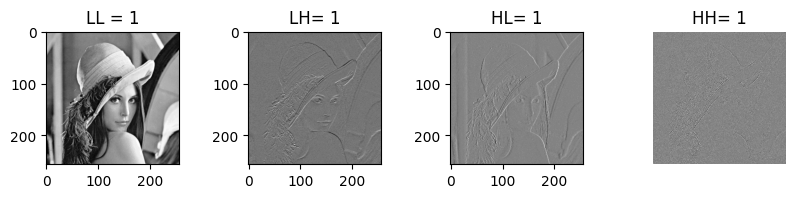

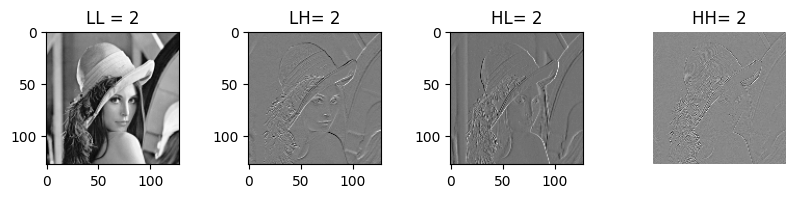

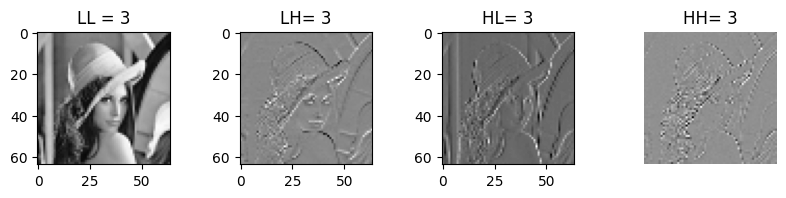

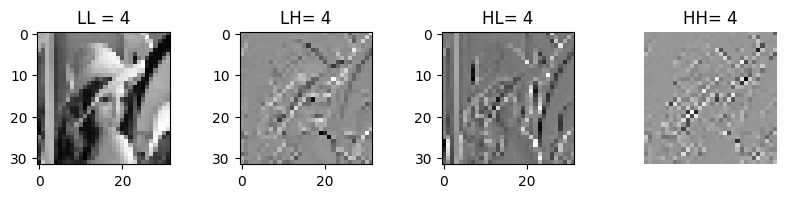

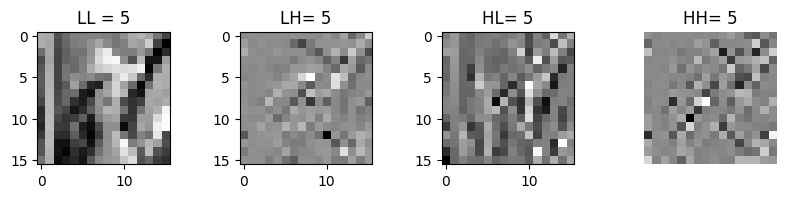

In [ ]:
levels = 5

aproximation = [lena_img]
all_part = []
wavelet = 'haar'

for i in range(levels):
    coeffs = pywt.dwt2(aproximation[-1], wavelet)
    cA, (cH, cV, cD) = coeffs
    aproximation.append(cA)
    all_part.append((cA, cH, cV, cD))


for i in range(levels):
  plt.figure(figsize=(10,10))

  # Approximation
  plt.subplot(levels, 4, 1 + (i*4))
  plt.imshow(all_part[i][0], cmap='gray')
  plt.title(f'LL = {i+1}')

  # Horizontal Detail
  plt.subplot(levels, 4, 2 + (i*4))
  plt.imshow(all_part[i][1], cmap='gray')
  plt.title(f'LH= {i+1}')

  # Vertical Detail
  plt.subplot(levels, 4, 3 + (i*4))
  plt.imshow(all_part[i][2], cmap='gray')
  plt.title(f'HL= {i+1}')

  # Diagonal Detail
  plt.subplot(levels, 4, 4 + (i*4))
  plt.imshow(all_part[i][3], cmap='gray')
  plt.title(f'HH= {i+1}')

  plt.axis('off')

  plt.show()

### 2.1.4.
Quantize all the wavelet coefficients (whole sub-bands) created in Prob. 2.1.3 by a step size of 𝛾 = 2. Then reconstruct the image from the quantized wavelet coefficients using Haar synthesis filter and Report PSNR values. <br/>
𝑐 ′ (𝑢, 𝑣) = 𝛾 × 𝑠𝑔𝑛[𝑐(𝑢, 𝑣)] × 𝑓𝑙𝑜𝑜𝑟 [ |𝑐(𝑢, 𝑣)| 𝛾 ] <br/>
(𝑐 represents the wavelet coefficient)

In [ ]:
def quantize_wavelet_coeffs(wavelet_coeffs, y):
  coeffs = np.array(wavelet_coeffs, dtype=object)
  for i in range(len(coeffs)):
    for j in range(len(coeffs[i])):
      for k in range(len(coeffs[i][j])):
        px = coeffs[i][j][k]
        coeffs[i][j][k] = np.floor(abs(px) / y) * np.sign(px) * y

  return coeffs

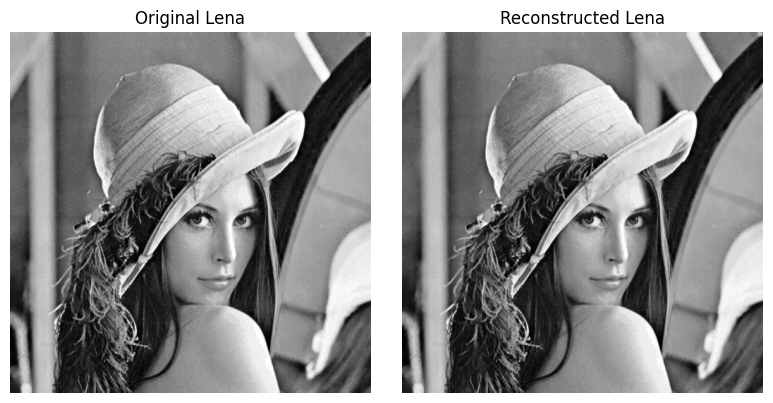

In [ ]:
lena = cv2.imread(LENA_PATH, cv2.IMREAD_GRAYSCALE)
wavelet = 'haar'
gamma = 2

# Computing wavelet transform coefficients
coeffs = pywt.dwt2(lena, wavelet)

# Quantizing the coefficients
quantized_coeffs = quantize_wavelet_coeffs(coeffs, gamma)

# Recunstruct the image
reconstructed_image = pywt.idwt2(quantized_coeffs, wavelet)

# Display the original Lena image and the reconstructed image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(lena, cmap='gray')
plt.title('Original Lena')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Lena')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
skimage.metrics.peak_signal_noise_ratio(lena, reconstructed_image)

<ipython-input-39-add866633e1a>:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  skimage.metrics.peak_signal_noise_ratio(lena, reconstructed_image)


48.29675491709899